In [1]:
import numpy as np

x_table = np.linspace(0, 6, 7)
y_table = np.sin(x_table)
dx_table = np.array([x_table[i + 1] - x_table[i] for i in range(len(x_table) - 1)])
dy_table = np.array([y_table[i + 1] - y_table[i] for i in range(len(y_table) - 1)])

x_table = np.roll(x_table, -1)
y_table = np.roll(y_table, -1)
dx_table = np.roll(dx_table, -1)
dy_table = np.roll(dy_table, -1)

In [2]:
np.stack((x_table, np.concatenate([dx_table, [None]]), y_table, np.concatenate([dy_table, [None]])))

array([[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 0.0],
       [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, None],
       [0.8414709848078965, 0.9092974268256817, 0.1411200080598672,
        -0.7568024953079282, -0.9589242746631385, -0.27941549819892586,
        0.0],
       [0.0678264420177852, -0.7681774187658145, -0.8979225033677954,
        -0.20212177935521025, 0.6795087764642126, 0.8414709848078965,
        None]], dtype=object)

In [3]:
A = np.zeros((5, 5))
for i in range(5):
    if i > 0:
        A[i, i - 1] = dx_table[i - 1] / 3
    A[i, i] = (dx_table[i] + dx_table[i - 1]) * 2 / 3
    if i < 4:
        A[i, i + 1] = dx_table[i] / 3

In [4]:
B = np.zeros(5)
for i in range(5):
    B[i] = dy_table[i] / dx_table[i] - dy_table[i - 1] / dx_table[i - 1]

In [5]:
np.concatenate((A, B.reshape(5, 1)), 1)

array([[ 1.33333333,  0.33333333,  0.        ,  0.        ,  0.        ,
        -0.77364454],
       [ 0.33333333,  1.33333333,  0.33333333,  0.        ,  0.        ,
        -0.83600386],
       [ 0.        ,  0.33333333,  1.33333333,  0.33333333,  0.        ,
        -0.12974508],
       [ 0.        ,  0.        ,  0.33333333,  1.33333333,  0.33333333,
         0.69580072],
       [ 0.        ,  0.        ,  0.        ,  0.33333333,  1.33333333,
         0.88163056]])

In [6]:
c = np.linalg.solve(A, B)
c = np.concatenate([c, [0]])

In [7]:
d = np.array([(c[i + 1] - c[i]) / dx_table[i] / 3 for i in range(5)])

In [8]:
b = np.full(5, None)
for i in range(5):
    b[i] = dy_table[i] / dx_table[i] - (c[i + 1] + 2 * c[i]) * dx_table[i] / 3

In [9]:
a = np.array([y_table[i] for i in range(5)])

In [10]:
np.stack([a, b, c[:5], d], 1)

array([[0.8414709848078965, 0.5370524159655572, -0.4566278532635089,
        -0.012598120684263156],
       [0.9092974268256817, -0.41399765261425, -0.4944222153162984,
        0.14024244916473386],
       [0.1411200080598672, -0.9821147357526452, -0.07369486782209683,
        0.15788710020694655],
       [-0.7568024953079282, -0.6558431707759993, 0.3999664327987428,
        0.05375495862204627],
       [-0.9589242746631385, 0.3053545706876249, 0.5612313086648816,
        -0.18707710288829385]], dtype=object)

In [11]:
from IPython.core.display import display, Math
from sympy import symbols, latex
sym_x = symbols('x')
for i in range(5):
    sym_dx = sym_x - x_table[i]
    sym_spline = a[i] + b[i] * sym_dx + c[i] * sym_dx**2 + d[i] * sym_dx**3
    display(Math(f'S_{i} = ' + latex(sym_spline.simplify().n(3))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
def build(i):
    def poly(x):
        dx = x - x_table[i]
        return a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3
    return poly
splines = [build(i) for i in range(5)]

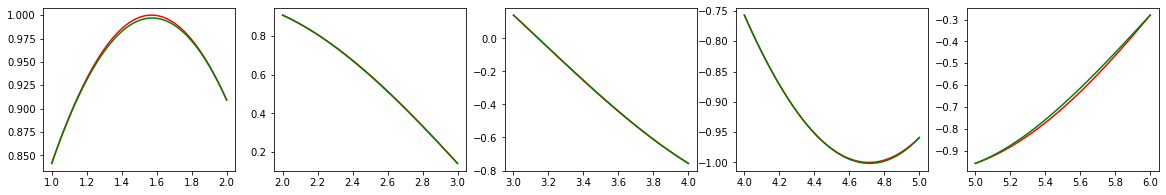

In [13]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 5, figsize=(20, 3))

for i in range(5):
    args_table = np.linspace(x_table[i], x_table[i + 1], 100)
    sin_table = np.sin(args_table)
    spline_table = splines[i](args_table)
    axs[i].plot(args_table, sin_table, 'r', args_table, spline_table, 'g')

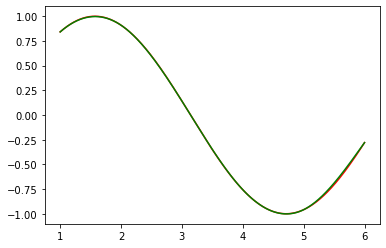

In [14]:
args_table, sin_table, spline_table = [], [], []
for i in range(5):
    args_table.append(np.linspace(x_table[i], x_table[i + 1], 100))
    sin_table.append(np.sin(args_table[i]))
    spline_table.append(splines[i](args_table[i]))
args_table = np.concatenate(args_table)
sin_table = np.concatenate(sin_table)
spline_table = np.concatenate(spline_table)

plt.plot(args_table, sin_table, 'r', args_table, spline_table, 'g');

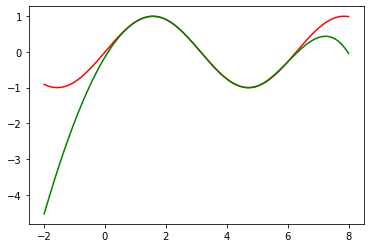

In [15]:
import bisect
normal_x_table = x_table[:6]
def spline(x):
    i = bisect.bisect_left(normal_x_table, x)
    if i == 0:
        return splines[0](x)
    if i == len(normal_x_table):
        return splines[-1](x)
    return splines[i - 1](x)

args_table = np.linspace(-2, 8, 1000)
sin_table = np.sin(args_table)
spline_table = np.array([spline(arg) for arg in args_table])
plt.plot(args_table, sin_table, 'r', args_table, spline_table, 'g');

In [16]:
args_table = np.linspace(1, 6, 10000)
sin_table = np.sin(args_table)
spline_table = np.array([spline(arg) for arg in args_table])
print(f'Max error = {max(np.abs(sin_table - spline_table))}')

Max error = 0.017193804074805974
